In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [6]:
train_data = '/kaggle/input/playground-series-s5e3/train.csv'
data = pd.read_csv(train_data)

In [7]:
test_data = '/kaggle/input/playground-series-s5e3/test.csv'

In [8]:
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [10]:
data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [11]:
data.shape

(2190, 13)

In [12]:
data.drop(columns=['id'], inplace=True)

In [13]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [14]:
data


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [15]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


<Axes: >

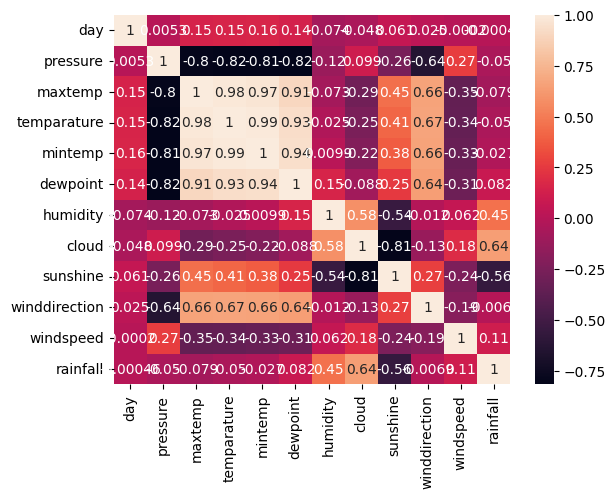

In [16]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [17]:
data.drop(columns=['day'], inplace=True)

In [18]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


<Axes: >

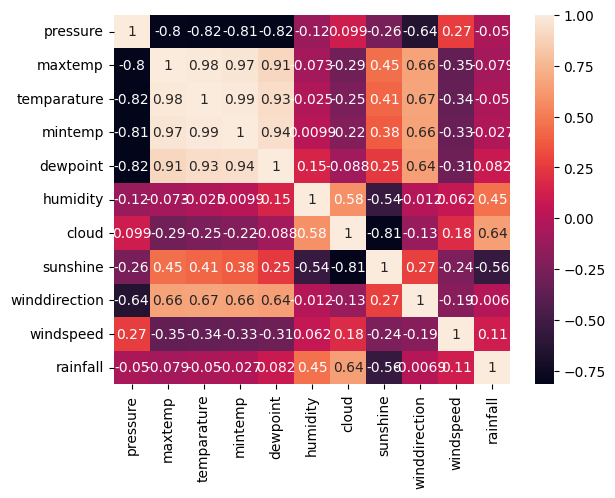

In [19]:
sns.heatmap(data.corr(), annot=True)

In [20]:
data['rainfall'].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [21]:
x = data.drop(columns=['rainfall'])
y = data['rainfall']

In [22]:
x.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(f"Model: {model.__class__.__name__}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model: RandomForestClassifier
Accuracy: 0.8470

Confusion Matrix:
 [[ 75  44]
 [ 23 296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       119
           1       0.87      0.93      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.78      0.79       438
weighted avg       0.84      0.85      0.84       438



In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(f"Model: {decision_tree.__class__.__name__}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model: DecisionTreeClassifier
Accuracy: 0.7922

Confusion Matrix:
 [[ 70  49]
 [ 42 277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       119
           1       0.85      0.87      0.86       319

    accuracy                           0.79       438
   macro avg       0.74      0.73      0.73       438
weighted avg       0.79      0.79      0.79       438



In [32]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(f"Model: {gaussian_nb.__class__.__name__}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model: GaussianNB
Accuracy: 0.8402

Confusion Matrix:
 [[ 83  36]
 [ 34 285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       119
           1       0.89      0.89      0.89       319

    accuracy                           0.84       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.84      0.84      0.84       438



In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(f"Model: {log_reg.__class__.__name__}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model: LogisticRegression
Accuracy: 0.8493

Confusion Matrix:
 [[ 72  47]
 [ 19 300]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
test_data = '/kaggle/input/playground-series-s5e3/test.csv'

In [81]:
df = pd.read_csv(test_data)

In [82]:
test_data = pd.read_csv(test_data)

In [83]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [84]:
test_data = test_data.drop(columns=['id','day'])

In [85]:
test_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [86]:
test_data.shape

(730, 10)

In [87]:
test_data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [88]:
test_data['winddirection'].unique()

array([ 50.,  40.,  20.,  70.,  10.,  60.,  30.,  80., 210., 200., 220.,
       230., 300., 140., 190., 180., 120., 270., 250., 240., 260., 160.,
       130., 110., 100.,  90.,  nan, 290., 280., 170.])

In [89]:
test_data['winddirection'].value_counts()

winddirection
70.0     96
220.0    85
40.0     85
20.0     81
50.0     61
60.0     52
230.0    52
80.0     51
30.0     29
200.0    24
10.0     19
240.0    16
100.0    10
90.0      7
160.0     7
190.0     7
180.0     7
110.0     6
210.0     6
120.0     5
250.0     5
300.0     5
140.0     3
290.0     3
270.0     2
130.0     2
260.0     1
280.0     1
170.0     1
Name: count, dtype: int64

In [90]:
test_data['winddirection'] = test_data['winddirection'].fillna(test_data['winddirection'].mode()[0])

In [91]:
test_data['winddirection'].unique()

array([ 50.,  40.,  20.,  70.,  10.,  60.,  30.,  80., 210., 200., 220.,
       230., 300., 140., 190., 180., 120., 270., 250., 240., 260., 160.,
       130., 110., 100.,  90., 290., 280., 170.])

In [92]:
test_data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [93]:
y_pred_test = random_forest.predict(test_data)
y_pred_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [94]:
len(y_pred_test)

730

In [95]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [96]:
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [97]:
df['rainfall'] = y_pred_test

In [101]:
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [107]:
sample_sub_data = df.drop(columns=['day', 'pressure', 'maxtemp', 'temparature', 'mintemp','dewpoint',
                                   'humidity', 'cloud', 'sunshine', 'winddirection',
                                    'windspeed'])
sample_sub_data.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [116]:
sample_sub_data.to_csv('predictions.csv', index=False)

## Function To train and test the model

In [34]:
def evaluate_model(model,x,y, test_size = 0.2, random_state = 42):

    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=random_state)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test,y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

In [35]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(model, x, y)

Model: RandomForestClassifier
Accuracy: 0.8470

Confusion Matrix:
 [[ 75  44]
 [ 23 296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       119
           1       0.87      0.93      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.78      0.79       438
weighted avg       0.84      0.85      0.84       438



In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
evaluate_model(model,x,y)

Model: DecisionTreeClassifier
Accuracy: 0.7922

Confusion Matrix:
 [[ 70  49]
 [ 42 277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       119
           1       0.85      0.87      0.86       319

    accuracy                           0.79       438
   macro avg       0.74      0.73      0.73       438
weighted avg       0.79      0.79      0.79       438



In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
evaluate_model(model,x,y)

Model: GaussianNB
Accuracy: 0.8402

Confusion Matrix:
 [[ 83  36]
 [ 34 285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       119
           1       0.89      0.89      0.89       319

    accuracy                           0.84       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.84      0.84      0.84       438



In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
evaluate_model(model,x,y)

Model: LogisticRegression
Accuracy: 0.8493

Confusion Matrix:
 [[ 72  47]
 [ 19 300]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.79       438
weighted avg       0.84      0.85      0.84       438



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
